In [3]:
import sys
sys.path.append('/g/g92/miao1/Development/llsmvis')
sys.path.append('/Users/yi10/Desktop/Research/Software/T-llsmvis/')
import llsmvis
from llsmvis.extensions import hp3d
from llsmvis.extensions.hp3d import surface_morphometrics
import os
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

Loading BokehJS ...

In [4]:
# ticket information (the output files from the interactive trimming results, see E1 for details)
tpath='/p/lustre2/yi10/llsm-data/CroppingData'
thead='2021-10-08-cell0'  
tlist=hp3d.croproi3d.get_trimmed_tiff_list(tpath, thead)

FileNotFoundError: [Errno 2] No such file or directory: '/p/lustre2/yi10/llsm-data/CroppingData/2021-10-08-cell0_fpath.txt'

# Extract the surface

In [4]:
#some paramaters for surface extraction
output_dir = '/p/lustre2/miao1/llsm_output'
save_mask=True
surface_smoothing_steps = 10

In [26]:
av = []
for t in range(0, len(tlist)):
    if t < 20: #remove this. for some reason other t values don't work
        continue
    fpath = tlist[t]
    k=io.imread(fpath)
    res = hp3d.masscenter.find_threshold_saddle_point(k)
    th = res[0][0]
    output_file = hp3d.surface_morphometrics.extract_surface(th, fpath=fpath, output_dir=output_dir, kernel_size=3, save_mask=True, surface_smoothing_steps=surface_smoothing_steps)
    print("****", output_file)
    av.append(surface_morphometrics.calc_morphometrics(output_file))

EXTRACT SURFACE  Trimmed_cell0_Iter_0_ch0_stack0020_3nm_0618989msec_0004238379msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-08-mCherryRAW264.7-condition1/focused-fast-scans/results_dsk/cell0_Iter_0_deskewed/trimmed_stacks/Trimmed_cell0_Iter_0_ch0_stack0020_3nm_0618989msec_0004238379msecAbs.tif
create binary mask with threshold 330
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
save binary mask to /p/lustre2/miao1/llsm_output
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lustre2/miao1/llsm_output
**** /p/lustre2/miao1/llsm_output/Trimmed_cell0_Iter_0_ch0_stack0020_3nm_0618989msec_0004238379msecAbs330_10.stl
surface area 62939.38222948389
volume 1278425.4964370239
ratio 0.04923195165060159
EXTRACT SURFACE  Trimmed_cell0_Iter_0_ch0_stack0021_3nm_0649953msec_0004269343msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-08

In [28]:
av = np.array(av)
av.shape
print(av)

(30, 2)

[[  62939.38222948 1278425.49643702]
 [  64481.57936513 1289768.113638  ]
 [  63231.74546415 1249871.54645028]
 [  65167.98761542 1255569.06712538]
 [  63213.70139528 1213117.71568448]
 [  62623.86625239 1253945.87167107]
 [  62563.60750023 1246987.99548526]
 [  63982.74878603 1226288.5812598 ]
 [  66662.50108678 1263067.83917747]
 [  63642.0105534  1257130.63949517]
 [  65491.26031601 1315407.52877088]
 [  65454.58599771 1318463.18243624]
 [  63708.75088305 1269533.89205671]
 [  66811.04190045 1282584.22422777]
 [  65653.16029737 1305422.96923241]
 [  64632.35333632 1279097.16022371]
 [  64848.80899745 1286197.93830484]
 [  63862.07865191 1290711.21760512]
 [  62983.51264213 1221659.21597345]
 [  63356.5429111  1244189.90569512]
 [  65899.00669122 1314418.68706927]
 [  66558.44969698 1320239.94697521]
 [  63448.26086676 1275146.41307943]
 [  63862.02650987 1248710.68057971]
 [  62614.17164843 1212471.54478301]
 [  65818.94938594 1308545.06104341]
 [  66055.07567372 1305112.61020797]
 

In [32]:
surface_areas = av[:, 0]
volumes = av[:, 1]

[1278425.49643702 1289768.113638   1249871.54645028 1255569.06712538
 1213117.71568448 1253945.87167107 1246987.99548526 1226288.5812598
 1263067.83917747 1257130.63949517 1315407.52877088 1318463.18243624
 1269533.89205671 1282584.22422777 1305422.96923241 1279097.16022371
 1286197.93830484 1290711.21760512 1221659.21597345 1244189.90569512
 1314418.68706927 1320239.94697521 1275146.41307943 1248710.68057971
 1212471.54478301 1308545.06104341 1305112.61020797 1278417.76554948
 1297662.91841133 1288340.35777737]


Text(0.5, 0, 'surface area')

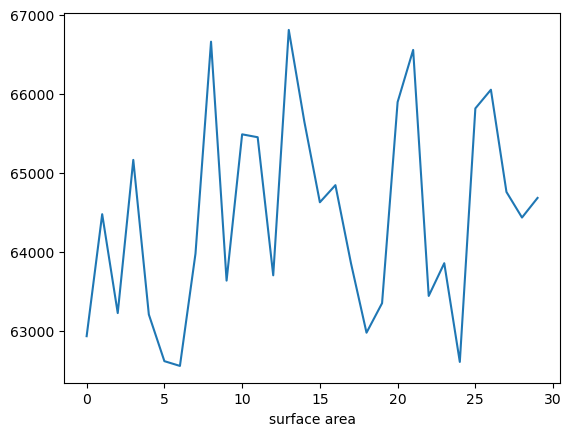

In [36]:
plt.plot(surface_areas)
plt.xlabel("surface area")
plt.show()

Text(0.5, 0, 'volume')

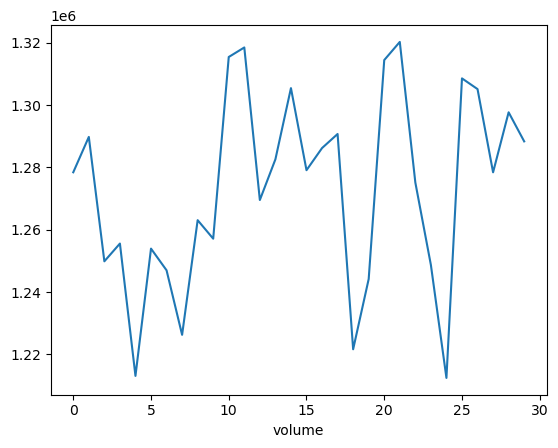

In [37]:
plt.plot(volumes)
plt.xlabel("volume")
plt.show()

Text(0.5, 0, 'ratios')

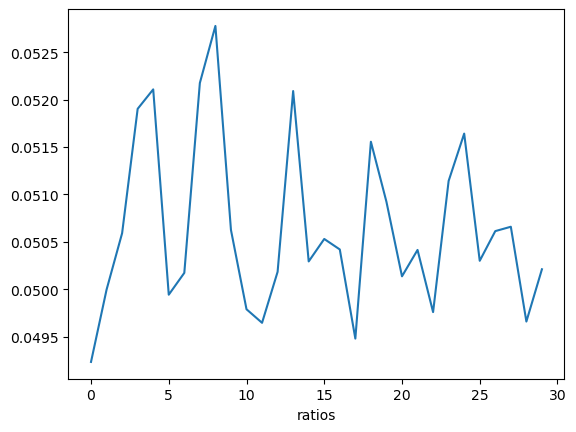

In [40]:
ratios = surface_areas / volumes
plt.plot(ratios)
plt.xlabel("ratios")
plt.show()

Text(0.5, 23.52222222222222, 'volume')

Text(33.722222222222214, 0.5, 'surface area')

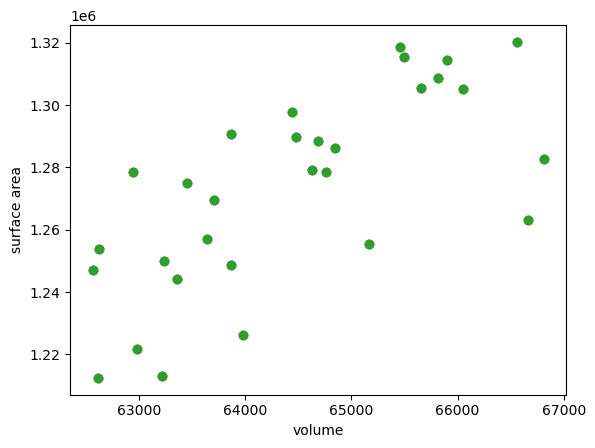

In [43]:
plt.scatter(surface_areas, volumes)
plt.xlabel("volume")
plt.ylabel("surface area")
plt.show()